In [13]:
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd

In [14]:
file_to_df = pd.read_json("/home/louis/LEON/DATA/Atoms/2024/PINNS2/CNN/experiment_results_multiple_power.json")
df_to_json = file_to_df.to_json()
json_to_dict = json.loads(df_to_json )

In [15]:
data_type_list = ["Density", "Density,\n Phase", "Density,\n Unwrapped\n Phase", "Phase", "Unwrapped\n Phase", "Density,\n Phase,\n Unwrapped\n Phase"]
models_list = ["v2", "v3", "v4", "v5"]

plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['font.size'] = 12

Model comparison

In [16]:
model_v2_accuracy_n2 = []
model_v2_index_error_n2 = []

model_v2_accuracy_power = []
model_v2_index_error_power = []

model_v2_accuracy_isat = []
model_v2_index_error_isat = []

model_v3_accuracy_n2 = []
model_v3_index_error_n2 = []

model_v3_accuracy_power = []
model_v3_index_error_power = []

model_v3_accuracy_isat = []
model_v3_index_error_isat = []

model_v4_accuracy_n2 = []
model_v4_index_error_n2 = []

model_v4_accuracy_power = []
model_v4_index_error_power = []

model_v4_accuracy_isat = []
model_v4_index_error_isat = []

model_v5_accuracy_n2 = []
model_v5_index_error_n2 = []

model_v5_accuracy_power = []
model_v5_index_error_power = []

model_v5_accuracy_isat = []
model_v5_index_error_isat = []

data_types = ["amp", "amp_pha", "amp_pha_unwrap", "pha", "pha_unwrap", "amp_pha_pha_unwrap"]
model_types = [["model_resnetv2",model_v2_accuracy_n2,model_v2_index_error_n2,
                model_v2_accuracy_power,model_v2_index_error_power,
                model_v2_accuracy_isat,model_v2_index_error_isat],
                ["model_resnetv3",model_v3_accuracy_n2,model_v3_index_error_n2,
                 model_v3_accuracy_power,model_v3_index_error_power,
                model_v3_accuracy_isat,model_v3_index_error_isat], 
                ["model_resnetv4",model_v4_accuracy_n2,model_v4_index_error_n2,
                 model_v4_accuracy_power,model_v4_index_error_power,
                model_v4_accuracy_isat,model_v4_index_error_isat],
                ["model_resnetv5",model_v5_accuracy_n2,model_v5_index_error_n2,
                 model_v5_accuracy_power,model_v5_index_error_power,
                model_v5_accuracy_isat,model_v5_index_error_isat]]

for data_type in data_types:
    for properties in model_types:
        model_type = properties[0]
        model_accuracy_n2 = properties[1]
        model_index_error_n2 = properties[2]

        model_accuracy_power = properties[3]
        model_index_error_power = properties[4]

        model_accuracy_isat = properties[5]
        model_index_error_isat = properties[6]

        model_accuracy_n2 += [json_to_dict[data_type][model_type][0]]
        model_index_error_n2 += [json_to_dict[data_type][model_type][1]]

        model_accuracy_power += [json_to_dict[data_type][model_type][2]]
        model_index_error_power += [json_to_dict[data_type][model_type][3]]

        model_accuracy_isat += [json_to_dict[data_type][model_type][4]]
        model_index_error_isat += [json_to_dict[data_type][model_type][5]]

In [17]:
for index in range(len(model_types)):
    for i in range(1,7):
        model_types[index][i] = np.array(model_types[index][i])

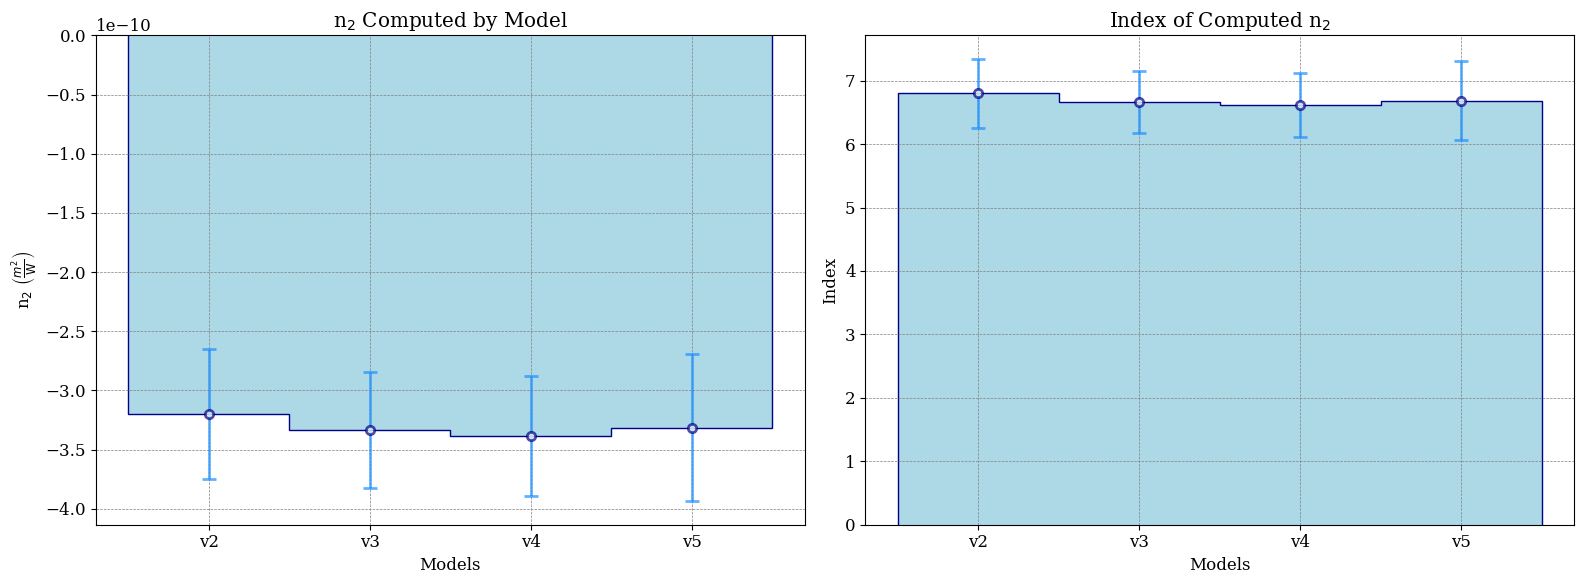

In [18]:
mean_accuracy_n2_models = np.zeros(4)
mean_index_error_n2_models = np.zeros(4)
std_accuracy_n2_models = np.zeros(4)
std_index_error_n2_models = np.zeros(4)


for index in range(len(model_types)):
    mean_accuracy_n2_models[index] = np.mean(model_types[index][1])
    mean_index_error_n2_models[index] = np.mean(model_types[index][2])
    std_accuracy_n2_models[index] = np.std(model_types[index][1])
    std_index_error_n2_models[index] = np.std(model_types[index][2])

x_positions = [0.5, 1.5, 2.5, 3.5]

# Creating subplots on the same row
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# First subplot
ax[0].grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')
ax[0].stairs(mean_accuracy_n2_models, fill=True, color='lightblue')
ax[0].stairs(mean_accuracy_n2_models, color='darkblue')
ax[0].errorbar(x_positions, mean_accuracy_n2_models, yerr=std_accuracy_n2_models, fmt="o", color="navy", ecolor='dodgerblue', elinewidth=2, capsize=5, alpha=0.7, markerfacecolor='white', markeredgecolor='navy', markeredgewidth=2)
ax[0].set_xticks(x_positions)
ax[0].set_xticklabels(models_list, rotation=0)
ax[0].set_title(r"n$_2$ Computed by Model")
ax[0].set_ylabel(r'n$_2\ \left(\frac{m^2}{\mathrm{W}}\right)$')
ax[0].set_xlabel('Models')

# Second subplot
ax[1].grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')
ax[1].stairs(mean_index_error_n2_models, fill=True, color='lightblue')
ax[1].stairs(mean_index_error_n2_models, color='darkblue')
ax[1].errorbar(x_positions, mean_index_error_n2_models, yerr=std_index_error_n2_models, fmt="o", color="navy", ecolor='dodgerblue', elinewidth=2, capsize=5, alpha=0.7, markerfacecolor='white', markeredgecolor='navy', markeredgewidth=2)
ax[1].set_xticks(x_positions)
ax[1].set_xticklabels(models_list, rotation=0)
ax[1].set_title(r"Index of Computed n$_2$")
ax[1].set_ylabel('Index')
ax[1].set_xlabel('Models')

plt.tight_layout()
plt.show()

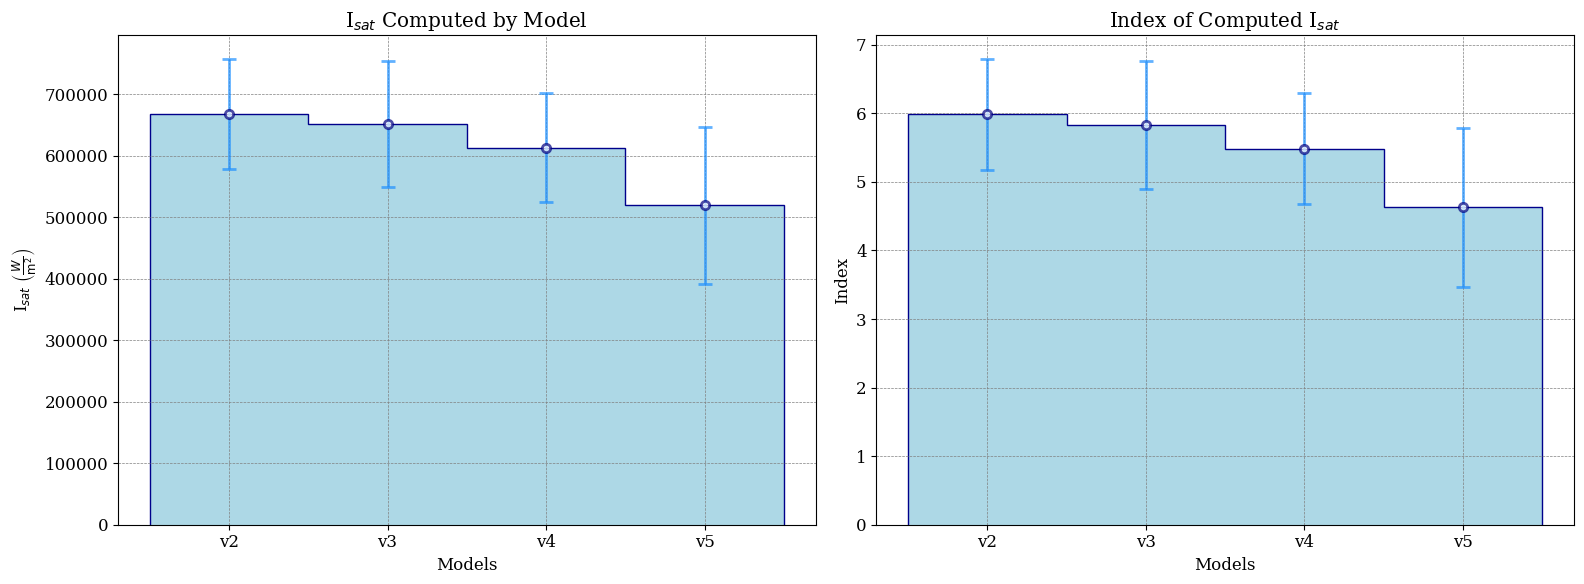

In [19]:
mean_accuracy_power_models = np.zeros(4)
mean_index_error_power_models = np.zeros(4)
std_accuracy_power_models = np.zeros(4)
std_index_error_power_models = np.zeros(4)


for index in range(len(model_types)):
    mean_accuracy_power_models[index] = np.mean(model_types[index][3])
    mean_index_error_power_models[index] = np.mean(model_types[index][4])
    std_accuracy_power_models[index] = np.std(model_types[index][3])
    std_index_error_power_models[index] = np.std(model_types[index][4])

x_positions = [0.5, 1.5, 2.5, 3.5]

# Creating subplots on the same row
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# First subplot
ax[0].grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')
ax[0].stairs(mean_accuracy_power_models, fill=True, color='lightblue')
ax[0].stairs(mean_accuracy_power_models, color='darkblue')
ax[0].errorbar(x_positions, mean_accuracy_power_models, yerr=std_accuracy_power_models, fmt="o", color="navy", ecolor='dodgerblue', elinewidth=2, capsize=5, alpha=0.7, markerfacecolor='white', markeredgecolor='navy', markeredgewidth=2)
ax[0].set_xticks(x_positions)
ax[0].set_xticklabels(models_list, rotation=0)
ax[0].set_title(r"Power Computed by Model")
ax[0].set_ylabel(r'Power\ (\mathrm{W})$')
ax[0].set_xlabel('Models')

# Second subplot
ax[1].grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')
ax[1].stairs(mean_index_error_power_models, fill=True, color='lightblue')
ax[1].stairs(mean_index_error_power_models, color='darkblue')
ax[1].errorbar(x_positions, mean_index_error_power_models, yerr=std_index_error_power_models, fmt="o", color="navy", ecolor='dodgerblue', elinewidth=2, capsize=5, alpha=0.7, markerfacecolor='white', markeredgecolor='navy', markeredgewidth=2)
ax[1].set_xticks(x_positions)
ax[1].set_xticklabels(models_list, rotation=0)
ax[1].set_title(r"Index of Computed Power")
ax[1].set_ylabel('Index')
ax[1].set_xlabel('Models')

plt.tight_layout()
plt.show()

In [26]:
mean_accuracy_isat_models = np.zeros(4)
mean_index_error_isat_models = np.zeros(4)
std_accuracy_isat_models = np.zeros(4)
std_index_error_isat_models = np.zeros(4)


for index in range(len(model_types)):
    mean_accuracy_isat_models[index] = np.mean(model_types[index][3])
    mean_index_error_isat_models[index] = np.mean(model_types[index][4])
    std_accuracy_isat_models[index] = np.std(model_types[index][5])
    std_index_error_isat_models[index] = np.std(model_types[index][6])

x_positions = [0.5, 1.5, 2.5, 3.5]

# Creating subplots on the same row
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# First subplot
ax[0].grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')
ax[0].stairs(mean_accuracy_isat_models, fill=True, color='lightblue')
ax[0].stairs(mean_accuracy_isat_models, color='darkblue')
ax[0].errorbar(x_positions, mean_accuracy_isat_models, yerr=std_accuracy_isat_models, fmt="o", color="navy", ecolor='dodgerblue', elinewidth=2, capsize=5, alpha=0.7, markerfacecolor='white', markeredgecolor='navy', markeredgewidth=2)
ax[0].set_xticks(x_positions)
ax[0].set_xticklabels(models_list, rotation=0)
ax[0].set_title(r"I$_{sat}$ Computed by Model")
ax[0].set_ylabel(r'I$_{sat}\ \left(\frac{W}{\mathrm{m^2}}\right)$')
ax[0].set_xlabel('Models')

# Second subplot
ax[1].grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')
ax[1].stairs(mean_index_error_isat_models, fill=True, color='lightblue')
ax[1].stairs(mean_index_error_isat_models, color='darkblue')
ax[1].errorbar(x_positions, mean_index_error_isat_models, yerr=std_index_error_isat_models, fmt="o", color="navy", ecolor='dodgerblue', elinewidth=2, capsize=5, alpha=0.7, markerfacecolor='white', markeredgecolor='navy', markeredgewidth=2)
ax[1].set_xticks(x_positions)
ax[1].set_xticklabels(models_list, rotation=0)
ax[1].set_title(r"Index of Computed I$_{sat}$")
ax[1].set_ylabel('Index')
ax[1].set_xlabel('Models')

plt.tight_layout()
plt.show()

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U1'), dtype('<U1')) -> None

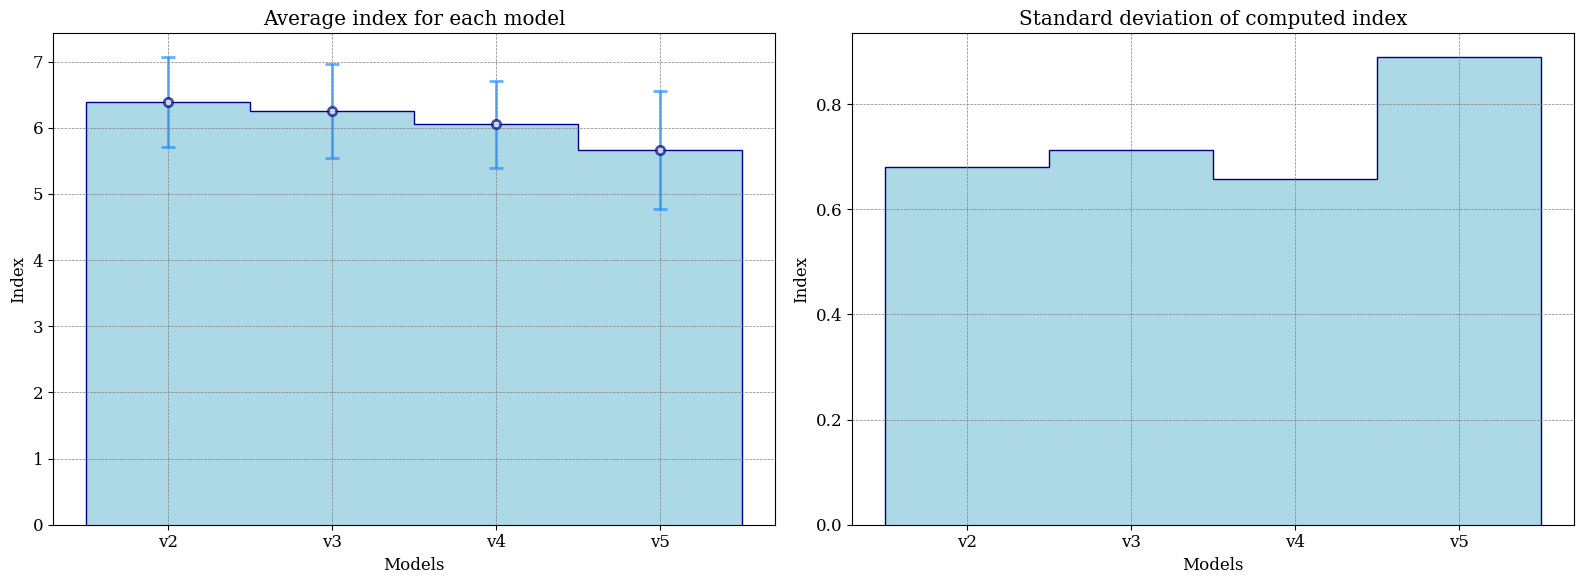

In [20]:
mean_accuracy_models = (mean_accuracy_n2_models + mean_accuracy_power_models + mean_accuracy_isat_models)/3
mean_index_error_models = (mean_index_error_n2_models + mean_index_error_power_models + mean_index_error_isat_models )/3
std_index_error_models = (std_index_error_n2_models + std_index_error_power_models + std_index_error_isat_models )/3

x_positions = [0.5, 1.5, 2.5, 3.5]

# Creating subplots on the same row
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# First subplot
ax[0].grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')
ax[0].stairs(mean_index_error_models, fill=True, color='lightblue')
ax[0].stairs(mean_index_error_models, color='darkblue')
ax[0].errorbar(x_positions,mean_index_error_models, yerr=std_index_error_models, fmt="o", color="navy", ecolor='dodgerblue', elinewidth=2, capsize=5, alpha=0.7, markerfacecolor='white', markeredgecolor='navy', markeredgewidth=2)
ax[0].set_xticks(x_positions)
ax[0].set_xticklabels(models_list, rotation=0)
ax[0].set_title("Average index for each model")
ax[0].set_ylabel('Index')
ax[0].set_xlabel('Models')

# Second subplot
ax[1].grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')
ax[1].stairs(std_index_error_models, fill=True, color='lightblue')
ax[1].stairs(std_index_error_models, color='darkblue')
ax[1].set_xticks(x_positions)
ax[1].set_xticklabels(models_list, rotation=0)
ax[1].set_title("Standard deviation of computed index")
ax[1].set_ylabel('Index')
ax[1].set_xlabel('Models')

plt.tight_layout()
plt.show()

Datatype comparison

In [21]:
amp_accuracy_n2 = []
amp_index_error_n2 = []

amp_accuracy_power = []
amp_index_error_power = []

amp_accuracy_isat = []
amp_index_error_isat = []

amp_pha_accuracy_n2 = []
amp_pha_index_error_n2 = []

amp_pha_accuracy_power = []
amp_pha_index_error_power = []

amp_pha_accuracy_isat = []
amp_pha_index_error_isat = []

amp_pha_unwrap_accuracy_n2 = []
amp_pha_unwrap_index_error_n2 = []

amp_pha_unwrap_accuracy_power = []
amp_pha_unwrap_index_error_power = []

amp_pha_unwrap_accuracy_isat = []
amp_pha_unwrap_index_error_isat = []

pha_accuracy_n2 = []
pha_index_error_n2 = []

pha_accuracy_power = []
pha_index_error_power = []

pha_accuracy_isat = []
pha_index_error_isat = []

pha_unwrap_accuracy_n2 = []
pha_unwrap_index_error_n2 = []

pha_unwrap_accuracy_power = []
pha_unwrap_index_error_power = []

pha_unwrap_accuracy_isat = []
pha_unwrap_index_error_isat = []

amp_pha_pha_unwrap_accuracy_n2 = []
amp_pha_pha_unwrap_index_error_n2 = []

amp_pha_pha_unwrap_accuracy_power = []
amp_pha_pha_unwrap_index_error_power = []

amp_pha_pha_unwrap_accuracy_isat = []
amp_pha_pha_unwrap_index_error_isat = []

data_types = [["amp",amp_accuracy_n2,amp_index_error_n2,
               amp_accuracy_power,amp_index_error_power,
                amp_accuracy_isat,amp_index_error_isat],
                ["amp_pha",amp_pha_accuracy_n2,amp_pha_index_error_n2,
                amp_pha_accuracy_isat,amp_pha_index_error_isat], 
                ["amp_pha_unwrap",amp_pha_unwrap_accuracy_n2,amp_pha_unwrap_index_error_n2,
                 amp_pha_unwrap_accuracy_power,amp_pha_unwrap_index_error_power,
                amp_pha_unwrap_accuracy_isat,amp_pha_unwrap_index_error_isat],
                ["pha",pha_accuracy_n2,pha_index_error_n2,
                 pha_accuracy_power,pha_index_error_power,
                pha_accuracy_isat,pha_index_error_isat],
                ["pha_unwrap",pha_unwrap_accuracy_n2,pha_unwrap_index_error_n2,
                 pha_unwrap_accuracy_power,pha_unwrap_index_error_power,
                pha_unwrap_accuracy_isat,pha_unwrap_index_error_isat],
                ["amp_pha_pha_unwrap",amp_pha_pha_unwrap_accuracy_n2,amp_pha_pha_unwrap_index_error_n2,
                 amp_pha_pha_unwrap_accuracy_power,amp_pha_pha_unwrap_index_error_power,
                amp_pha_pha_unwrap_accuracy_isat,amp_pha_pha_unwrap_index_error_isat]]


model_types = ["model_resnetv2","model_resnetv3","model_resnetv4","model_resnetv5"]

for model_type in model_types:
    for properties in data_types:
        data_type = properties[0]
        data_accuracy_n2 = properties[1]
        data_index_error_n2 = properties[2]
        data_accuracy_isat = properties[3]
        data_index_error_isat = properties[4]

        data_accuracy_n2 += [json_to_dict[data_type][model_type][0]]
        data_index_error_n2 += [json_to_dict[data_type][model_type][1]]

        data_accuracy_isat += [json_to_dict[data_type][model_type][2]]
        data_index_error_isat += [json_to_dict[data_type][model_type][3]]

In [22]:
for index in range(len(data_types)):
    for i in range(1,7):
        data_types[index][i] = np.array(data_types[index][i])

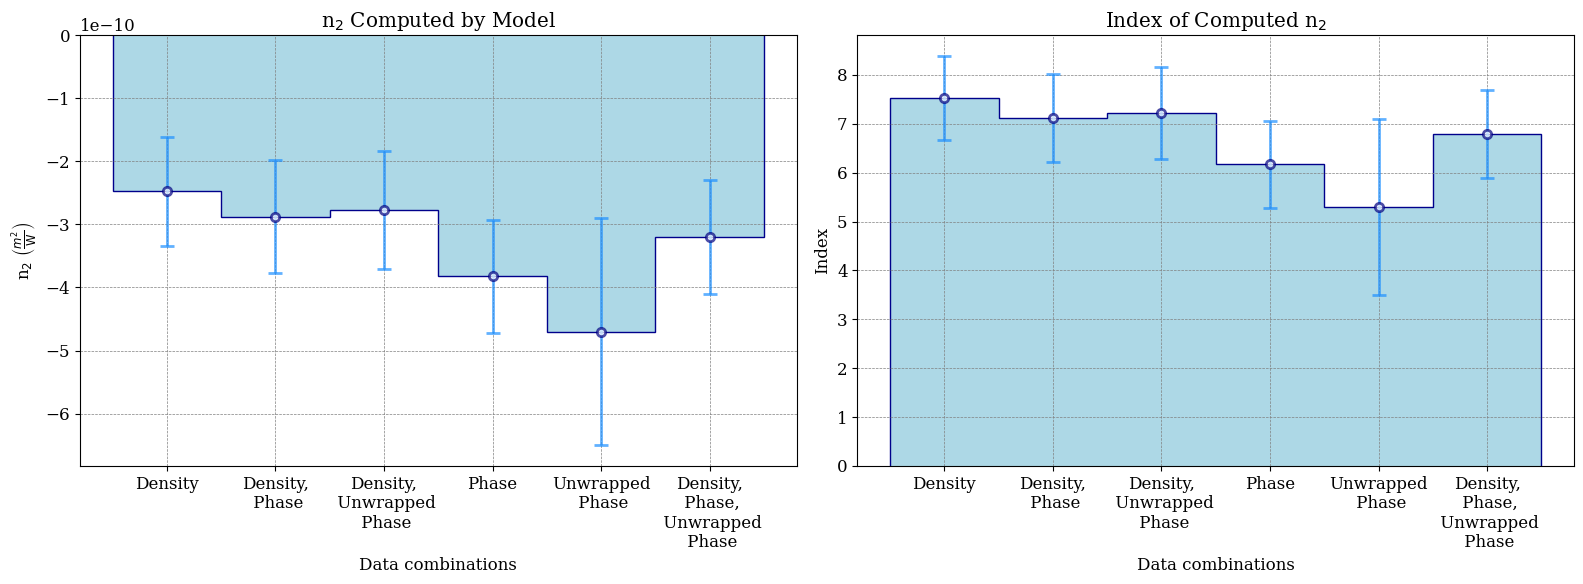

In [23]:
mean_accuracy_data_n2 = np.zeros(6)
mean_index_error_data_n2 = np.zeros(6)
std_accuracy_data_n2 = np.zeros(6)
std_index_error_data_n2 = np.zeros(6)


for index in range(len(data_types)):
    mean_accuracy_data_n2[index] = np.mean(data_types[index][1])
    mean_index_error_data_n2[index] = np.mean(data_types[index][2])
    std_accuracy_data_n2[index] = np.std(data_types[index][1])
    std_index_error_data_n2[index] = np.std(data_types[index][2])

x_positions = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
# Creating subplots on the same row
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# First subplot
ax[0].grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')
ax[0].stairs(mean_accuracy_data_n2, fill=True, color='lightblue')
ax[0].stairs(mean_accuracy_data_n2, color='darkblue')
ax[0].errorbar(x_positions, mean_accuracy_data_n2, yerr=std_accuracy_data_n2, fmt="o", color="navy", ecolor='dodgerblue', elinewidth=2, capsize=5, alpha=0.7, markerfacecolor='white', markeredgecolor='navy', markeredgewidth=2)
ax[0].set_xticks(x_positions)
ax[0].set_xticklabels(data_type_list, rotation=0)
ax[0].set_title(r"n$_2$ Computed by Model")
ax[0].set_ylabel(r'n$_2\ \left(\frac{m^2}{\mathrm{W}}\right)$')
ax[0].set_xlabel('Data combinations')

# Second subplot
ax[1].grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')
ax[1].stairs(mean_index_error_data_n2, fill=True, color='lightblue')
ax[1].stairs(mean_index_error_data_n2, color='darkblue')
ax[1].errorbar(x_positions, mean_index_error_data_n2, yerr=std_index_error_data_n2, fmt="o", color="navy", ecolor='dodgerblue', elinewidth=2, capsize=5, alpha=0.7, markerfacecolor='white', markeredgecolor='navy', markeredgewidth=2)
ax[1].set_xticks(x_positions)
ax[1].set_xticklabels(data_type_list, rotation=0)
ax[1].set_title(r"Index of Computed n$_2$")
ax[1].set_ylabel('Index')
ax[1].set_xlabel('Data combinations')

plt.tight_layout()
plt.show()

In [ ]:
mean_accuracy_data_power = np.zeros(6)
mean_index_error_data_power = np.zeros(6)
std_accuracy_data_power = np.zeros(6)
std_index_error_data_power = np.zeros(6)


for index in range(len(data_types)):
    mean_accuracy_data_power[index] = np.mean(data_types[index][3])
    mean_index_error_data_power[index] = np.mean(data_types[index][4])
    std_accuracy_data_power[index] = np.std(data_types[index][3])/np.sqrt(len(data_types[index][3]))
    std_index_error_data_power[index] = np.std(data_types[index][4])/np.sqrt(len(data_types[index][4]))

x_positions = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
# Creating subplots on the same row
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# First subplot
ax[0].grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')
ax[0].stairs(mean_accuracy_data_power, fill=True, color='lightblue')
ax[0].stairs(mean_accuracy_data_power, color='darkblue')
ax[0].errorbar(x_positions, mean_accuracy_data_power, yerr=std_accuracy_data_power, fmt="o", color="navy", ecolor='dodgerblue', elinewidth=2, capsize=5, alpha=0.7, markerfacecolor='white', markeredgecolor='navy', markeredgewidth=2)
ax[0].set_xticks(x_positions)
ax[0].set_xticklabels(data_type_list, rotation=0)
ax[0].set_title(r"Power Computed by data combination")
ax[0].set_ylabel(r'Power\ \left(\mathrm{W}\right)$')
ax[0].set_xlabel('Data combinations')

# Second subplot
ax[1].grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')
ax[1].stairs(mean_index_error_data_power, fill=True, color='lightblue')
ax[1].stairs(mean_index_error_data_power, color='darkblue')
ax[1].errorbar(x_positions, mean_index_error_data_power, yerr=std_index_error_data_power, fmt="o", color="navy", ecolor='dodgerblue', elinewidth=2, capsize=5, alpha=0.7, markerfacecolor='white', markeredgecolor='navy', markeredgewidth=2)
ax[1].set_xticks(x_positions)
ax[1].set_xticklabels(data_type_list, rotation=0)
ax[1].set_title(r"Index of Computed Power")
ax[1].set_ylabel('Index')
ax[1].set_xlabel('Data combinations')

plt.tight_layout()
plt.show()

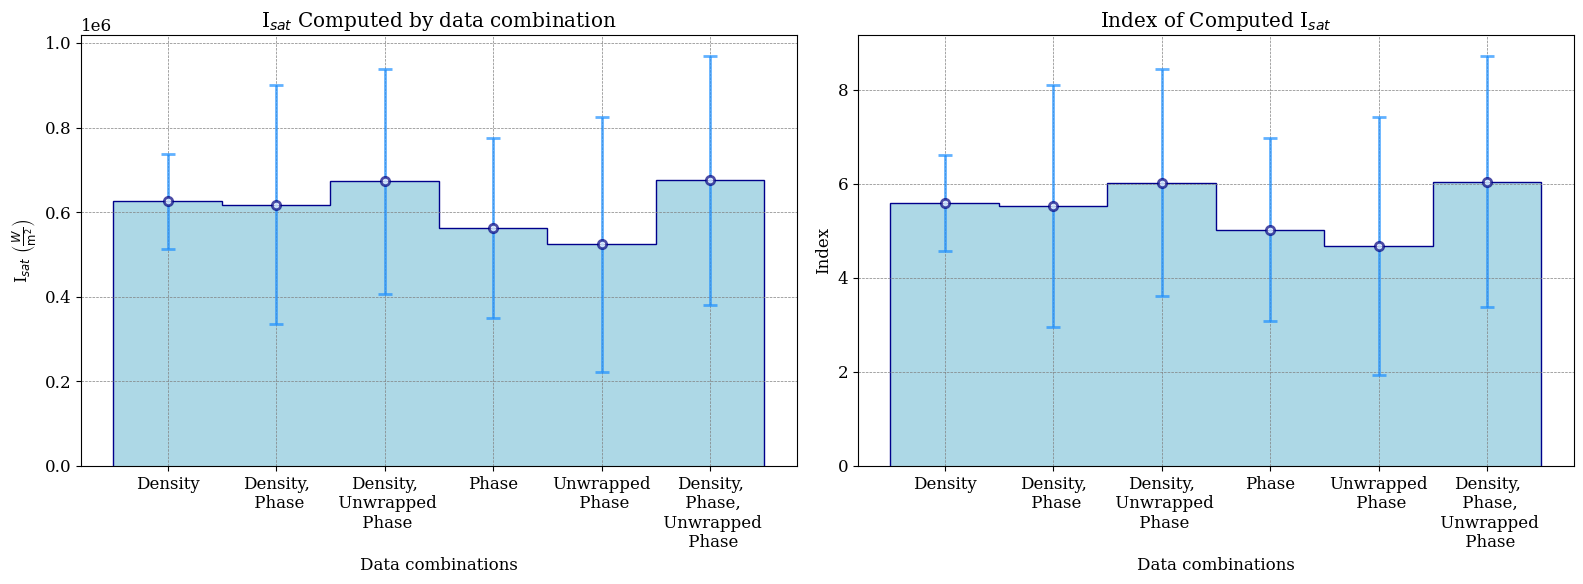

In [24]:
mean_accuracy_data_isat = np.zeros(6)
mean_index_error_data_isat = np.zeros(6)
std_accuracy_data_isat = np.zeros(6)
std_index_error_data_isat = np.zeros(6)


for index in range(len(data_types)):
    mean_accuracy_data_isat[index] = np.mean(data_types[index][5])
    mean_index_error_data_isat[index] = np.mean(data_types[index][6])
    std_accuracy_data_isat[index] = np.std(data_types[index][5])/np.sqrt(len(data_types[index][5]))
    std_index_error_data_isat[index] = np.std(data_types[index][6])/np.sqrt(len(data_types[index][6]))

x_positions = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
# Creating subplots on the same row
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# First subplot
ax[0].grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')
ax[0].stairs(mean_accuracy_data_isat, fill=True, color='lightblue')
ax[0].stairs(mean_accuracy_data_isat, color='darkblue')
ax[0].errorbar(x_positions, mean_accuracy_data_isat, yerr=std_accuracy_data_isat, fmt="o", color="navy", ecolor='dodgerblue', elinewidth=2, capsize=5, alpha=0.7, markerfacecolor='white', markeredgecolor='navy', markeredgewidth=2)
ax[0].set_xticks(x_positions)
ax[0].set_xticklabels(data_type_list, rotation=0)
ax[0].set_title(r"I$_{sat}$ Computed by data combination")
ax[0].set_ylabel(r'I$_{sat}\ \left(\frac{W}{\mathrm{m^2}}\right)$')
ax[0].set_xlabel('Data combinations')

# Second subplot
ax[1].grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')
ax[1].stairs(mean_index_error_data_isat, fill=True, color='lightblue')
ax[1].stairs(mean_index_error_data_isat, color='darkblue')
ax[1].errorbar(x_positions, mean_index_error_data_isat, yerr=std_index_error_data_isat, fmt="o", color="navy", ecolor='dodgerblue', elinewidth=2, capsize=5, alpha=0.7, markerfacecolor='white', markeredgecolor='navy', markeredgewidth=2)
ax[1].set_xticks(x_positions)
ax[1].set_xticklabels(data_type_list, rotation=0)
ax[1].set_title(r"Index of Computed I$_{sat}$")
ax[1].set_ylabel('Index')
ax[1].set_xlabel('Data combinations')

plt.tight_layout()
plt.show()

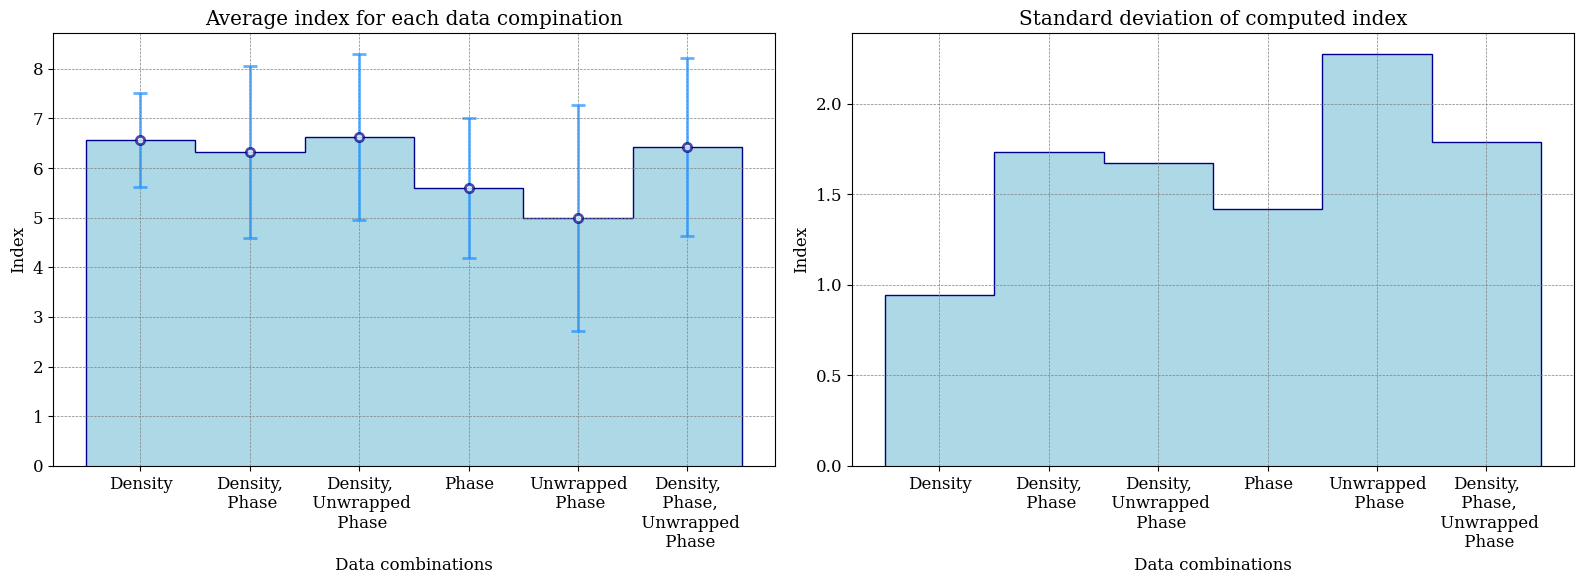

In [25]:
mean_accuracy_data = (mean_accuracy_data_n2 + mean_accuracy_data_power + mean_accuracy_data_isat)/3
mean_index_error_data = (mean_index_error_data_n2 + mean_index_error_data_power + mean_index_error_data_isat )/3
std_index_error_data = (std_index_error_data_n2 + std_index_error_data_power + std_index_error_data_isat )/3

x_positions = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
# Creating subplots on the same row
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# First subplot
ax[0].grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')
ax[0].stairs(mean_index_error_data, fill=True, color='lightblue')
ax[0].stairs(mean_index_error_data, color='darkblue')
ax[0].errorbar(x_positions,mean_index_error_data, yerr=std_index_error_data, fmt="o", color="navy", ecolor='dodgerblue', elinewidth=2, capsize=5, alpha=0.7, markerfacecolor='white', markeredgecolor='navy', markeredgewidth=2)
ax[0].set_xticks(x_positions)
ax[0].set_xticklabels(data_type_list, rotation=0)
ax[0].set_title("Average index for each data compination")
ax[0].set_ylabel('Index')
ax[0].set_xlabel('Data combinations')

# Second subplot
ax[1].grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')
ax[1].stairs(std_index_error_data, fill=True, color='lightblue')
ax[1].stairs(std_index_error_data, color='darkblue')
ax[1].set_xticks(x_positions)
ax[1].set_xticklabels(data_type_list, rotation=0)
ax[1].set_title("Standard deviation of computed index")
ax[1].set_ylabel('Index')
ax[1].set_xlabel('Data combinations')

plt.tight_layout()
plt.show()